# Logistic Regression

Now that we can calculate gradient descent for any function, lets apply the steps to a logistic function. Logistic regression is used in classification. Logistic function outputs a number between 0 and 1, which help us to understand for example if a picture cat or no.




## Sigmoid Function

We define the sigmoid function as below:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

Lets plot the function to see what it outputs:


In [19]:
import numpy as np
import matplotlib.pyplot as plt
def g(z):
    return 1 / (1 + np.exp(-z))

Text(0, 0.5, 'g(z)')

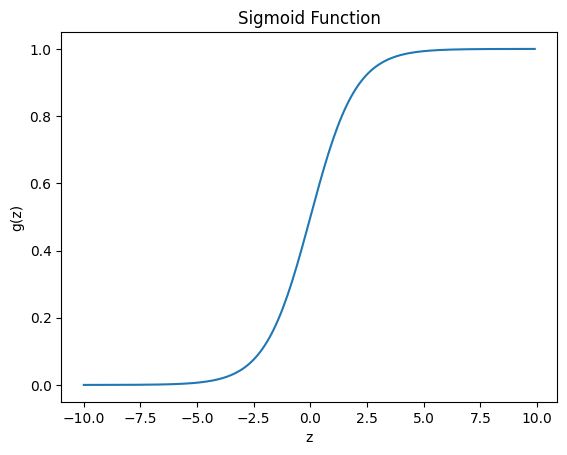

In [24]:
x = np.arange(-10, 10, 0.1)
y = g(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("g(z)")

You can see that the output of the function is between 0 and 1. Also this is very good for classification due that the function slowly switch between 0 and 1.

Now that we have seen our sigmoid function, we introduce **z** as follow:

$$ z = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

## Logistic Function

Finally our logistic function becomes:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

where

$$g(z) = \frac{1}{1+e^{-z}}$$


## Goal

Given a dataset like this:

|  x1 |  x2 | y |
|-----|-----|---|
| 0.5 | 1.5 | 0 |
|  1  |  1  | 0 |
| 1.5 | 0.5 | 0 |
|  3  | 0.5 | 1 |
|  2  |  2  | 1 |
|  1  | 2.5 | 1 |

Fit the best logistic function!

## Solution

We know that cost function with regularization is defined as below:

$$ J_{\mathbf{w},b} = \frac {1}{m} (\sum_{i=0}^{m-1}L(f_{\mathbf{w},b}(\mathbf{x^{(i)}}),y^{(i)})) + \frac {\lambda}{2m}(\sum_{j=1}^{n}w_j^2)$$

### Loss Function

Now we need to define the loss function. Our loss function should follow the rules:

1. Should determine how far is the function output from the expected output
2. Should be positive
3. We should select the correct loss function that makes a convex (a function with only one global minimum and no local minimum) cost function ($J_{\mathbf{w},b}$).

In practice, when we apply linear regression loss function to logistic regression, we see that the function is not convex and has a multiple local minimum. 

#### Cross-Entropy Loss Function

The best loss function that works for logistic regression, which is called cross-entropy, is defined as below:

\begin{equation}
  L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

Which we can write as a mathematical function:

$$ L(f_{\mathbf{w},b}(\mathbf{x}^{(i)})) = -y^{(i)} \left(\log(f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) - (1 - y^{(i)}) \left(\log(1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})\right) $$


### Gradient Descent

Now that we have our cost function, we can get derivative of it. We need to calculate each of $\frac {\partial J_{\mathbf{w}, b}} {\partial w_1}$ ,$\frac {\partial J_{\mathbf{w}, b}} {\partial w_2}$, ... ,$\frac {\partial J_{\mathbf{w}, b}} {\partial w_n}$, $\frac {\partial J_{\mathbf{w}, b}} {\partial b}$ (mathematical work!)

So lets begin (it's going to be very long mathematical work, so enjoy!)

Note: In logistic regression, the default base of log is e. So you can assume it's `ln`! I know it's confusing, but everyone accepted this.

Lets first start by getting $\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j}$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = -y^{(i)} \frac {1} {f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \frac {\partial f} {\partial w_j} + \frac {1 - y^{(i)}} {1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \frac {\partial f} {\partial w_j}$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \left( \frac {1 - y^{(i)}} {1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)})} - \frac {y^{(i)}} {f_{\mathbf{w},b}(\mathbf{x}^{(i)})} \right)$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \left( \frac { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} + y^{(i)} f_{\mathbf{w},b}(\mathbf{x}^{(i)})} { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) ( 1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} \right)$$

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {\partial f} {\partial w_j} \frac { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}} { f_{\mathbf{w},b}(\mathbf{x}^{(i)}) ( 1 - f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} \tag{1}$$

Now that we have the partial derivation for loss function we need to replace the f. We know that:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$ 

where

$$g(z) = \frac{1}{1+e^{-z}}$$

so:

$$ \frac {\partial f}{\partial w_j} = \frac {\partial g} {\partial w_j} $$


Now for g, we get the chain derivative:

$$ \frac {\partial g}{\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^ 2} \frac {\partial z} {\partial w_j}$$

And for z we have: 

$$ z = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$

Therefore the derivative for it is equal to:

$$ \frac {\partial z}{\partial w_j} = x_j^{(i)} $$

So our derivative for g , becomes:

$$ \frac {\partial g}{\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^ 2} x_j^{(i)} $$

Now by replacing the g in the loss function (formula 1) (note that g = f):

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \frac {e^{-z}} {(1 + e^{-z}) ^2} \frac { \frac {1}{1 + e^{-z}} - y^{(i)}} { \frac {1}{1 + e^{-z}} (1 - \frac{1}{1 + e^{-z}})} x_j^{(i)} $$

After simplifying the equation we get to:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \left( \frac {1}{1 + e^{-z}} - y^{(i)} \right) x_j^{(i)} $$

Which is equal to:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial w_j} = \left( f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)} $$

And by reaping the same steps for b, we get:

$$\frac {\partial L(f_{\mathbf{w},b}(\mathbf{x}^{(i)}))} {\partial b} = f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)} $$

Now that we have the equations for loss functions, we can easily replace them in the cost function.

$$ J_{\mathbf{w},b} = \frac {1}{m} (\sum_{i=0}^{m-1}L(f_{\mathbf{w},b}(\mathbf{x^{(i)}}),y^{(i)})) + \frac {\lambda}{2m}(\sum_{j=1}^{n}w_j^2)$$

$$ \frac {\partial J_{\mathbf{w},b}} {\partial w_j} = \frac {1}{m} (\sum_{i=0}^{m-1}\frac{\partial L}{\partial w_j}) + \frac {\lambda}{m} w_j $$


$$ \frac {\partial J_{\mathbf{w},b}} {\partial w_j} = \frac {1}{m} (\sum_{i=0}^{m-1}\left( (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}\right) + \frac {\lambda}{m} w_j $$